# Exploratory Data Analysis - Task 3 - Case Yara

## Question: 
> The VP of Commercial Excellence Americas, the loyalty program’s sponsor, requested the analytics team to evaluate the program’s success by comparing loyalty to non-loyalty farmers. Are loyalty users different from regular users in relation to the main KPIs, app utilization and churn? Another important aspect is to understand if there are any BUs being more successful in acquiring and maintaining users in our digital tools. Create a 10-15 min presentation, bearing in mind she is not familiarized with technical data analysis terms. Please feel free to suggest data driven action plans. 

### KPIs to keep in mind
- **Active users**: users that have used the app at least once in the last 12-rolling months. If last event is earlier than that, the user is considered to have churned. 
- **Active fields**: non-archived fields belonging to active users. 
- **Active hectares**: field area belonging to active fields. 

### Steps to follow in the analysis
1. [Data Preparation:](#1.-Data-Preparation) 
   1. Load Dataset to Pandas;
   2. Clean the data by handling missing values, inconsistencies or outliers, if necessary;
   3. Create a new column to identify active users;
2. [Compare Loyalty vs. Non-Loyalty users:](#2.-Compare-Loyalty-vs.-Non-Loyalty-users)
   1. Split the dataset into loyalty users and non-loyalty users based on the loyalty column;
   2. Calculate and compare the main KPIs (active users, active fields, active hectares) between loyalty users and non-loyalty users;
3. [Analyze app utilization:](#3.-Analyze-app-utilization)
   1. Split the dataset for loyalty users and non-loyalty users;
   2. Calculate and compare the average utilization of these app features between the two user groups;
4. [Analyze churn:](#4.-Analyze-churn)
   1. Identify churned users using the active users column created;
   2. Calculate the churn rate for loyalty users and non-loyalty users;
   3. Compare the churn rates between the two user groups;
   4. Consider using additional factors like user engagement metrics to understand the reasons for churn;
5. [Evaluate Business Unit Performance:](#5.-Evaluate-Business-Unit-Performance)
   1. Group the data by Business Unit using the `bu_name` column;
   2. Calculate the number of active users, active fields, and active hectares for each BU;
   3. Identify the BUs that have the highest acquisition and retention rates of users in the digital tools;
6. [Summarize and Present Findings:](#6.-Summarize-and-Present-Findings)
   1. Summarize the key findings and insights from the analysis;



## 1. Data Preparation

In [95]:
import pandas as pd
import sys 
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../python/function')
from data_cleaning_and_processing import data_cleaning_and_processing
# Set the float format option
pd.options.display.float_format = '{:.2f}'.format

# Set option for pandas to display all the columns
pd.set_option('display.max_columns', None)

# set configurations for searborn 
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5.27)})

### 1.1. Load Dataset to Pandas

In [96]:
# Load the dataset
case_dataset = data_cleaning_and_processing.prepare_dataset(r"../dataset_provided/agtech_use_case.csv")
# case_dataset = case_dataset.loc[case_dataset.user_type == 'farmer']
case_dataset

,id,user_type,bu_name,loyalty,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area,main_crop,state,region
0,1,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
1,5,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
2,6,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
3,7,farmer,NaN,False,2023-07-06,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
4,14,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,112663,NaN,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12766,112676,advisor,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12767,112685,advisor,NaN,False,2021-09-07,2021-09-07,670,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12768,112702,advisor,NaN,False,2021-09-07,2021-09-07,670,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN


### 1.2. Clean the data by handling missing values, inconsistencies or outliers, if necessary

#### Data cleaning steps already performed:
- replaced all occurrences of the dot character `.` with the forward slash character `/` in the `user_reg_date` and `last_event_date`
- converted the values in the `user_reg_date`, `last_event_date`, `recommendation_generated_last_date`, `map_created_last_date`, `monitoring_last_date`, `field_exploring_last_date` columns from a _string_ format to a _datetime_ format
- replaced specific values in the `user_type` column of the `case_dataset` DataFrame
- applied a lambda function to the `loyalty` column of the `case_dataset` DataFrame. If the cell contains `YES`, it is `TRUE`, otherwise it is `FALSE`
- removed any leading whitespace from the values in the `main_crop` column


In [97]:
case_dataset.describe()

,id,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area
count,12770.00,12770,12770,12770.00,94.00,94,547.00,547,400.00,1768.00,1768,985.00,1899.00,1899,1122.00,12770.00,12770.00,12770.00,12770.00,3765.00
mean,55160.32,2022-06-05 22:57:38.480814336,2022-07-20 15:41:14.612372992,353.44,1.61,2022-09-07 15:03:49.787234048,3.79,2022-09-13 16:06:08.555758592,3.57,48.81,2022-07-14 17:14:23.348416256,51.81,30.56,2022-08-03 20:54:58.578199040,34.46,3343.45,3.70,0.54,35548.13,122098.51
min,1.00,1922-06-24 00:00:00,2021-09-07 00:00:00,1.00,1.00,2021-10-21 00:00:00,1.00,2021-04-15 00:00:00,1.00,1.00,2019-08-04 00:00:00,1.00,1.00,2021-04-13 00:00:00,1.00,0.00,0.00,0.00,0.00,0.01
25%,28511.75,2021-12-02 00:00:00,2021-12-21 00:00:00,146.00,1.00,2022-06-24 18:00:00,1.00,2022-07-08 00:00:00,1.00,3.00,2022-02-21 00:00:00,4.00,2.00,2022-05-01 12:00:00,3.00,0.00,0.00,0.00,0.00,1.27
50%,53594.00,2022-05-04 00:00:00,2022-07-07 00:00:00,367.00,1.00,2022-08-08 12:00:00,2.00,2022-08-12 00:00:00,1.00,9.50,2022-07-27 00:00:00,12.00,6.00,2022-08-02 00:00:00,9.00,0.00,0.00,0.00,0.00,20.48
75%,82317.00,2023-01-16 00:00:00,2023-02-13 00:00:00,565.00,2.00,2022-11-28 18:00:00,3.00,2022-11-22 12:00:00,3.00,30.00,2022-12-11 06:00:00,36.00,23.00,2022-11-29 00:00:00,30.75,1.00,1.00,1.00,0.20,427.04
max,112711.00,2023-07-08 00:00:00,2025-11-21 00:00:00,670.00,12.00,2023-07-01 00:00:00,127.00,2023-07-08 00:00:00,127.00,5378.00,2023-07-08 00:00:00,5151.00,1176.00,2023-07-08 00:00:00,853.00,27612467.00,5546.00,70.00,193410010.40,193410010.40
std,31910.74,NaN,NaN,218.81,1.53,NaN,9.18,NaN,9.43,207.47,NaN,206.69,84.48,NaN,80.81,263776.63,64.26,2.16,2126758.31,3916933.90


##### Findings

In [98]:
case_describe = case_dataset.describe()
case_describe

,id,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area
count,12770.00,12770,12770,12770.00,94.00,94,547.00,547,400.00,1768.00,1768,985.00,1899.00,1899,1122.00,12770.00,12770.00,12770.00,12770.00,3765.00
mean,55160.32,2022-06-05 22:57:38.480814336,2022-07-20 15:41:14.612372992,353.44,1.61,2022-09-07 15:03:49.787234048,3.79,2022-09-13 16:06:08.555758592,3.57,48.81,2022-07-14 17:14:23.348416256,51.81,30.56,2022-08-03 20:54:58.578199040,34.46,3343.45,3.70,0.54,35548.13,122098.51
min,1.00,1922-06-24 00:00:00,2021-09-07 00:00:00,1.00,1.00,2021-10-21 00:00:00,1.00,2021-04-15 00:00:00,1.00,1.00,2019-08-04 00:00:00,1.00,1.00,2021-04-13 00:00:00,1.00,0.00,0.00,0.00,0.00,0.01
25%,28511.75,2021-12-02 00:00:00,2021-12-21 00:00:00,146.00,1.00,2022-06-24 18:00:00,1.00,2022-07-08 00:00:00,1.00,3.00,2022-02-21 00:00:00,4.00,2.00,2022-05-01 12:00:00,3.00,0.00,0.00,0.00,0.00,1.27
50%,53594.00,2022-05-04 00:00:00,2022-07-07 00:00:00,367.00,1.00,2022-08-08 12:00:00,2.00,2022-08-12 00:00:00,1.00,9.50,2022-07-27 00:00:00,12.00,6.00,2022-08-02 00:00:00,9.00,0.00,0.00,0.00,0.00,20.48
75%,82317.00,2023-01-16 00:00:00,2023-02-13 00:00:00,565.00,2.00,2022-11-28 18:00:00,3.00,2022-11-22 12:00:00,3.00,30.00,2022-12-11 06:00:00,36.00,23.00,2022-11-29 00:00:00,30.75,1.00,1.00,1.00,0.20,427.04
max,112711.00,2023-07-08 00:00:00,2025-11-21 00:00:00,670.00,12.00,2023-07-01 00:00:00,127.00,2023-07-08 00:00:00,127.00,5378.00,2023-07-08 00:00:00,5151.00,1176.00,2023-07-08 00:00:00,853.00,27612467.00,5546.00,70.00,193410010.40,193410010.40
std,31910.74,NaN,NaN,218.81,1.53,NaN,9.18,NaN,9.43,207.47,NaN,206.69,84.48,NaN,80.81,263776.63,64.26,2.16,2126758.31,3916933.90


In [99]:
print('1. There are {:,.0f} lines in the dataset'.format(case_describe[(case_describe.index == 'count')]['id'].sum()))
print('2. The first user registered was {} and the last one was {}'.format(case_describe[(case_describe.index == 'min')]['user_reg_date'].sum(), case_describe[(case_describe.index == 'max')]['user_reg_date'].sum()))
print('3. The first last event date was {} and the most recent event date was {}'.format(case_describe[(case_describe.index == 'min')]['last_event_date'].sum(), case_describe[(case_describe.index == 'max')]['last_event_date'].sum()))
print('4. The first recommendation was {} and the last recommendation was {}'.format(case_describe[(case_describe.index == 'min')]['recommendation_generated_last_date'].sum(), case_describe[(case_describe.index == 'max')]['recommendation_generated_last_date'].sum()))
print('5. The first map created was {} and the last map created was {}'.format(case_describe[(case_describe.index == 'min')]['map_created_last_date'].sum(), case_describe[(case_describe.index == 'max')]['map_created_last_date'].sum()))
print('6. The average number of maps created in the last 365 days is {:,.1f}, with the median {:,.1f}'.format(case_describe[(case_describe.index == 'mean')]['map_created_last365days'].sum(), case_describe[(case_describe.index == '50%')]['map_created_last365days'].sum()))
print('7. The average monitoring events is {:,.1f}, minimum is 1 and maximum is {:,.0f}.'.format(case_describe[(case_describe.index == 'mean')]['monitoring_events'].sum(), case_describe[(case_describe.index == 'max')]['monitoring_events'].sum()))
print('8. The first monitoring event last date was {} and the last was {}'.format(case_describe[(case_describe.index == 'min')]['monitoring_last_date'].sum(), case_describe[(case_describe.index == 'max')]['monitoring_last_date'].sum()))
print('9. The average of monitoring events in the last 365 days is {:,.2f}, minimum is {:,.0f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['monitoring_last365days'].sum(), case_describe[(case_describe.index == 'min')]['monitoring_last365days'].sum(), case_describe[(case_describe.index == 'max')]['monitoring_last365days'].sum()))
print('10. The field exploring events average is {:,.2f}, with minimum {:,.0f} and maximum {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['field_exploring_events'].sum(), case_describe[(case_describe.index == 'min')]['field_exploring_events'].sum(), case_describe[(case_describe.index == 'max')]['field_exploring_events'].sum()))
print('11. The first field exploring last date was {} and the last was {}'.format(case_describe[(case_describe.index == 'min')]['field_exploring_last_date'].sum(), case_describe[(case_describe.index == 'max')]['field_exploring_last_date'].sum()))
print('12. The field exploring in the last 365 days average is {:,.2f}, minimum is {:,.0f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['field_exploring_last365days'].sum(), case_describe[(case_describe.index == 'min')]['field_exploring_last365days'].sum(), case_describe[(case_describe.index == 'max')]['field_exploring_last365days'].sum()))
print('13. The average of active fields is {:,.2f}, with minimum and median being {:,.0f} and maximum {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['n_active_fields'].sum(), case_describe[(case_describe.index == 'min')]['n_active_fields'].sum(), case_describe[(case_describe.index == 'max')]['n_active_fields'].sum()))
print('14. The average number of fields is {:,.1f}, with minimum and median being {:,.0f} and maximum {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['n_fields'].sum(), case_describe[(case_describe.index == 'min')]['n_fields'].sum(), case_describe[(case_describe.index == 'max')]['n_fields'].sum()))
print('15. The average number of farms is {:,.2f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['n_farms'].sum(), case_describe[(case_describe.index == 'max')]['n_farms'].sum()))
print('16. The average total active field area is {:,.2f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['total_active_field_area'].sum(), case_describe[(case_describe.index == 'max')]['total_active_field_area'].sum()))
print('17. The average total field area is {:,.2f} and maximum is {:,.2f}'.format(case_describe[(case_describe.index == 'mean')]['total_field_area'].sum(), case_describe[(case_describe.index == 'max')]['total_field_area'].sum()))
print("18. There are {} duplicates in id".format(case_dataset['id'].duplicated().sum()))
print("19. There are {} business units names available for {} lines. There others are empty".format(case_dataset['bu_name'].drop_duplicates().dropna().count(), case_dataset['bu_name'].dropna().count()))
print("20. There are {} loyalty users and {} are non-loyalty users".format(case_dataset.loc[case_dataset.loyalty == True, 'loyalty'].count(), case_dataset.loc[case_dataset.loyalty == False, 'loyalty'].count()))
print("21. Only the loyalty users has business units associated with them")
print("22. There are {} lines with state filled and {} with region filled. Only {} region is filled and doesn't have the state filled.".format(case_dataset.loc[(case_dataset.state.isna() == False), 'state'].count(), case_dataset.loc[(case_dataset.region.isna() == False), 'region'].count(), case_dataset.loc[(case_dataset.state.isna() == True) & (case_dataset.region.isna() == False), 'region'].drop_duplicates().count()))

1. There are 12,770 lines in the dataset
2. The first user registered was 1922-06-24 00:00:00 and the last one was 2023-07-08 00:00:00
3. The first last event date was 2021-09-07 00:00:00 and the most recent event date was 2025-11-21 00:00:00
4. The first recommendation was 2021-10-21 00:00:00 and the last recommendation was 2023-07-01 00:00:00
5. The first map created was 2021-04-15 00:00:00 and the last map created was 2023-07-08 00:00:00
6. The average number of maps created in the last 365 days is 3.6, with the median 1.0
7. The average monitoring events is 48.8, minimum is 1 and maximum is 5,378.
8. The first monitoring event last date was 2019-08-04 00:00:00 and the last was 2023-07-08 00:00:00
9. The average of monitoring events in the last 365 days is 51.81, minimum is 1 and maximum is 5,151
10. The field exploring events average is 30.56, with minimum 1 and maximum 1,176
11. The first field exploring last date was 2021-04-13 00:00:00 and the last was 2023-07-08 00:00:00
12. Th

#### Cleaning by removing outliers and inconsistencies from the data

##### monitoring_events

In [100]:
# copying the dataset for historical reasons
case_dataset_clean = case_dataset.copy()

# filter only filled monitoring events
case_monitoring_events_view = case_dataset_clean.loc[case_dataset_clean.monitoring_events.isna() == False, ['monitoring_events']]

# create bins for each range of monitoring events
bins = np.arange(0, case_monitoring_events_view.monitoring_events.max() + 537,537)
case_monitoring_events_view['groups'] = pd.cut(case_monitoring_events_view['monitoring_events'], bins)

print('By the print it is possible to see that the data above 2148 we can consider as outliers. Such Data will be removed.\n')
# view the data grouped by bins 
print(case_monitoring_events_view[['groups', 'monitoring_events']].groupby('groups').count().reset_index())

# adding to the dataset only the data where the monitoring_events column has the value < 2148 or is null 
case_dataset_clean = case_dataset_clean.loc[(case_dataset_clean.monitoring_events < 2148) | (case_dataset_clean.monitoring_events.isna() == True)]

By the print it is possible to see that the data above 2148 we can consider as outliers. Such Data will be removed.

              groups  monitoring_events
0       (0.0, 537.0]               1746
1    (537.0, 1074.0]                 12
2   (1074.0, 1611.0]                  3
3   (1611.0, 2148.0]                  5
4   (2148.0, 2685.0]                  0
5   (2685.0, 3222.0]                  0
6   (3222.0, 3759.0]                  1
7   (3759.0, 4296.0]                  0
8   (4296.0, 4833.0]                  0
9   (4833.0, 5370.0]                  0
10  (5370.0, 5907.0]                  1


##### monitoring_last365days

There is nothing to be cleaned in the column monitoring_last365days.


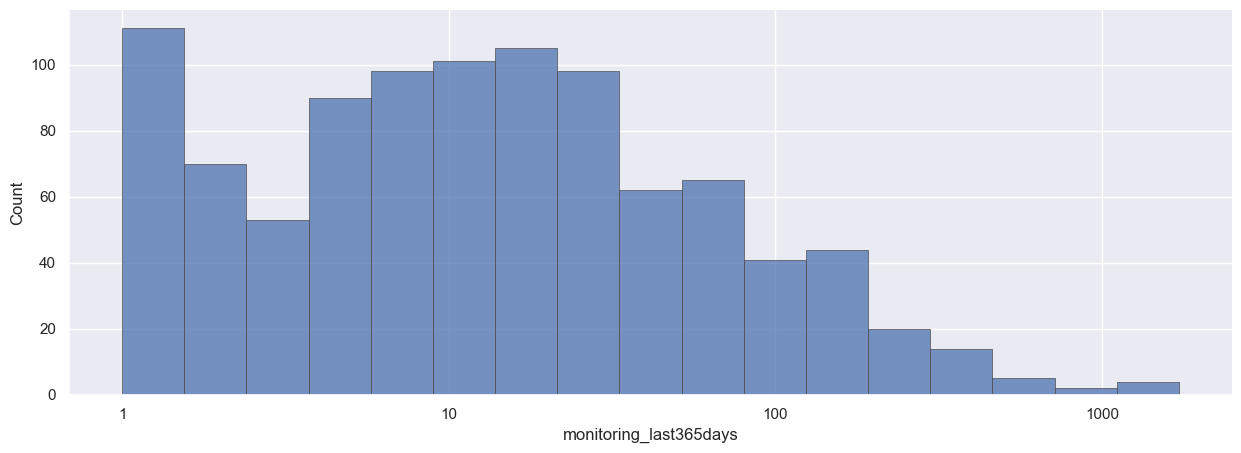

In [101]:
# filter only filled monitoring events
case_monitoring_last365days_view = case_dataset_clean.loc[case_dataset_clean.monitoring_last365days.isna() == False, ['monitoring_last365days']]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    case_monitoring_last365days_view,
    x="monitoring_last365days", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

print("There is nothing to be cleaned in the column monitoring_last365days.")

##### field_exploring_events

There is nothing to be cleaned in the column field_exploring_events.


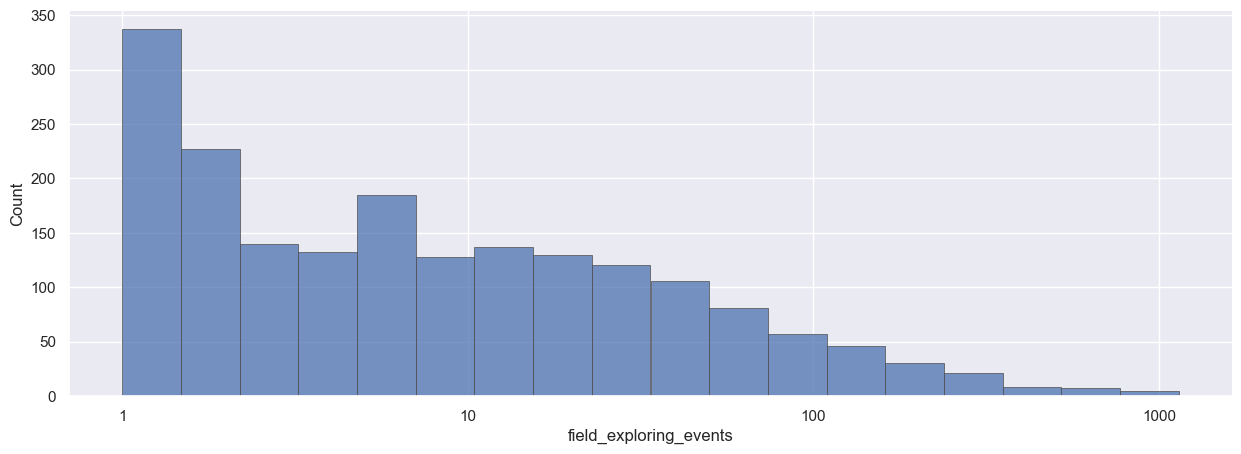

In [102]:
# filter only filled monitoring events
case_field_exploring_events_view = case_dataset_clean.loc[case_dataset_clean.field_exploring_events.isna() == False, ['field_exploring_events']]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    case_field_exploring_events_view,
    x="field_exploring_events", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

print("There is nothing to be cleaned in the column field_exploring_events.")

##### n_active_fields

In the boxplot is easy to identify a really large number of outliers. This plot contains 12768 data points.


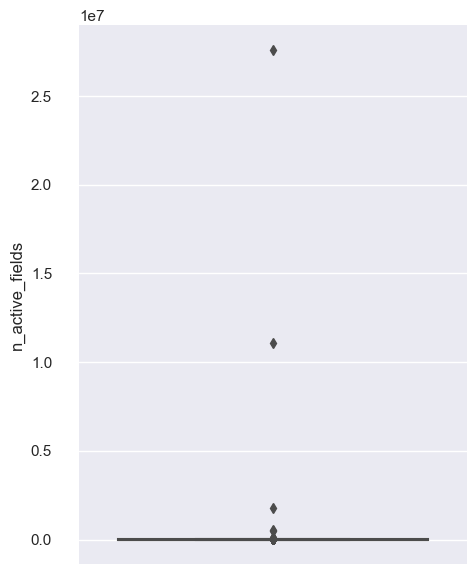

In [103]:
# filter only filled n_active_fields
case_n_active_fields_view = case_dataset_clean.loc[case_dataset_clean.n_active_fields.isna() == False, ['n_active_fields']]

# configure the figure size
sns.set(rc={'figure.figsize':(5,7)})

# plot the boxplot for visualization
sns.boxplot(y="n_active_fields",
            data=case_n_active_fields_view)

sns.despine(offset=10, trim=True)

print('In the boxplot is easy to identify a really large number of outliers. This plot contains {} data points.'.format(case_dataset_clean.loc[case_dataset_clean.n_active_fields.isna() == False, 'n_active_fields'].count()))

We can see that now the data is closer to each other and we can continue using this data. We removed 5 outliers, so this plot contains 12763 data points.


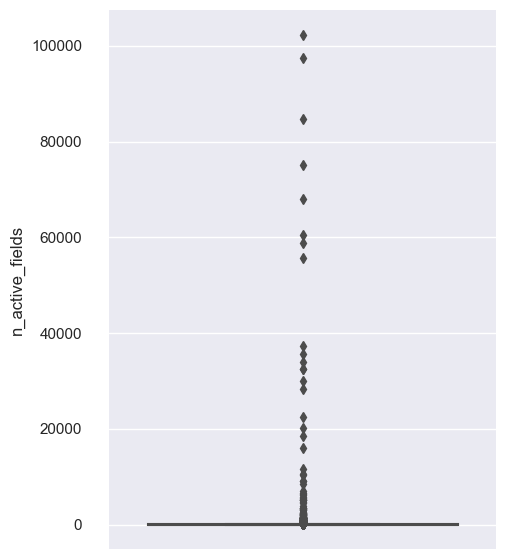

In [104]:
# get mean and standard deviation
mean_value = case_n_active_fields_view['n_active_fields'].mean()
std_value = case_n_active_fields_view['n_active_fields'].std()

# Define outlier threshold as 1 to mitigate the influence of extreme values on the overall distribution
threshold = 1   

# Identify outliers by comparing the absolute difference of each value in the 'n_active_fields' column to the mean with a threshold based on the standard deviation.
outlier_mask = abs(case_n_active_fields_view['n_active_fields'] - mean_value) > (threshold * std_value)

# Remove outliers
df_filtered = case_n_active_fields_view[~outlier_mask]

# Print the filtered DataFrame without outliers
sns.boxplot(y="n_active_fields",
            data=df_filtered)

sns.despine(offset=10, trim=True)

# explanation of what was done and 
print('We can see that now the data is closer to each other and we can continue using this data. We removed {} outliers, so this plot contains {} data points.'.format(case_n_active_fields_view.loc[outlier_mask, 'n_active_fields'].count(), df_filtered['n_active_fields'].count()))

case_dataset_clean = case_dataset_clean[~outlier_mask]

##### filling missing data
n_fields / total_field_area / recommendation_generated / map_created / map_created_last365days / monitoring_events / monitoring_last365days / field_exploring_events / field_exploring_last365days

In [105]:
# fill missing values
case_dataset_clean['n_fields'] = case_dataset_clean['n_fields'].fillna(0)
case_dataset_clean['total_field_area'] = case_dataset_clean['total_field_area'].fillna(0.0)
case_dataset_clean['recommendation_generated'] = case_dataset_clean['recommendation_generated'].fillna(0.0).astype(int)
case_dataset_clean['map_created'] = case_dataset_clean['map_created'].fillna(0.0).astype(int)
case_dataset_clean['map_created_last365days'] = case_dataset_clean['map_created_last365days'].fillna(0.0).astype(int)
case_dataset_clean['monitoring_events'] = case_dataset_clean['monitoring_last365days'].fillna(0.0).astype(int)
case_dataset_clean['field_exploring_events'] = case_dataset_clean['field_exploring_events'].fillna(0.0).astype(int)
case_dataset_clean['field_exploring_last365days'] = case_dataset_clean['field_exploring_last365days'].fillna(0.0).astype(int)

##### total_n_fields

During the analysis, it was identified that the numbers contained in the columns `n_active_fields` and `n_fields` should be added together. It is understood that the column `n_fields` is the total of fields, but as it is smaller than the total of active fields, this information means that the column only contains the total of fields that are not active, therefore, it is necessary to do the sum of the columns to capture the total of fields available to the user.

In [106]:
case_dataset_clean['total_n_fields'] = case_dataset_clean.n_active_fields + case_dataset_clean.n_fields

#### region
removing regions that are not in Brazil

In [107]:
case_dataset_clean = case_dataset_clean.loc[(~case_dataset_clean.region.isin(['Cantabria','Veracruz']))]

### 1.3 Create a new column to identify active users

In [108]:
# Calculate the current date for churn calculation
current_date = pd.to_datetime('today')

# copy the dataset clean to a new variable to keep historical data
case_dataset_prepared = case_dataset_clean.copy()

### Active users: users that have used the app at least once in the last 12-rolling months. If last event is earlier than that, the user is considered to have churned.
# Calculate active users by creating a column called active_users, where users that are active receives true, otherwise false.
case_dataset_prepared.loc[case_dataset_prepared['last_event_date'] >= current_date - pd.DateOffset(years=1), 'active_users'] = True
case_dataset_prepared.loc[case_dataset_prepared.active_users.isna(), 'active_users'] = False

# 2. Select or Create Relevant Features and Prepare the dataset for Churn Model

### Checking for data balancing

In [109]:
print(case_dataset_prepared.active_users.value_counts())
print("\nThe users who churned represents {:.2f}% do dataset.\n".format((case_dataset_prepared[case_dataset_prepared.active_users == False].shape[0] / case_dataset_prepared.shape[0]) * 100))

active_users
False    6561
True     6200
Name: count, dtype: int64

The users who churned represents 51.41% do dataset.



### Selection relevant data for the model



In [110]:
case_dataset_prepared.drop(['bu_name'], axis='columns', inplace=True)

##### Creating columns for the model

In [111]:
# create column churn date
case_dataset_prepared['churn_date'] = case_dataset_prepared.loc[case_dataset_prepared.active_users == False, 'last_event_date']
# days to churn
case_dataset_prepared['days_to_churn'] = (case_dataset_prepared.loc[case_dataset_prepared.active_users == False,'churn_date'] - case_dataset_prepared.loc[case_dataset_prepared.active_users == False,'user_reg_date']).dt.days

# days registered
case_dataset_prepared['days_registered'] = abs(case_dataset_prepared.user_reg_date - datetime.now()).dt.days

# days_since_last_event
case_dataset_prepared['days_since_last_event'] = abs(case_dataset_prepared.last_event_date - datetime.now()).dt.days

# days_since_last_map_created
case_dataset_prepared['days_since_last_map_created'] = abs(case_dataset_prepared.map_created_last_date - datetime.now()).dt.days

# days_since_last_recommendation
case_dataset_prepared['days_since_last_recommendation'] = abs(case_dataset_prepared.recommendation_generated_last_date - datetime.now()).dt.days

# days_since_last_monitoring
case_dataset_prepared['days_since_last_monitoring'] = abs(case_dataset_prepared.monitoring_last_date - datetime.now()).dt.days

# days_since_last_field_exploring
case_dataset_prepared['days_since_last_field_exploring'] = abs(case_dataset_prepared.field_exploring_last_date - datetime.now()).dt.days

# change the column active_users to churn
case_dataset_prepared['churn'] = case_dataset_prepared['active_users'].replace({False: 1, True: 0}) 

#### Dropping columns that will not be used

In [112]:
case_dataset_prepared.drop(['active_users','user_reg_date', 'map_created_last_date', 'last_event_date','recommendation_generated_last_date','monitoring_last_date','field_exploring_last_date', 'churn_date', 'days_to_churn'], axis='columns', inplace=True)

In [123]:
case_dataset_prepared[['churn', ]]

,id,user_type,loyalty,days_since_last_visit,recommendation_generated,map_created,map_created_last365days,monitoring_events,monitoring_last365days,field_exploring_events,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area,main_crop,state,region,total_n_fields,days_registered,days_since_last_event,days_since_last_map_created,days_since_last_recommendation,days_since_last_monitoring,days_since_last_field_exploring,churn
0,1,farmer,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,NaN,NaN,NaN,0,7,7,NaN,NaN,NaN,NaN,0
1,5,farmer,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,NaN,NaN,NaN,0,7,7,NaN,NaN,NaN,NaN,0
2,6,farmer,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,NaN,NaN,NaN,0,7,7,NaN,NaN,NaN,NaN,0
3,7,farmer,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,NaN,NaN,NaN,0,9,7,NaN,NaN,NaN,NaN,0
4,14,farmer,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,NaN,NaN,NaN,0,7,7,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,112663,NaN,False,669,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,NaN,NaN,NaN,0,675,675,NaN,NaN,NaN,NaN,1
12766,112676,advisor,False,669,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,NaN,NaN,NaN,0,675,675,NaN,NaN,NaN,NaN,1
12767,112685,advisor,False,670,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,NaN,NaN,NaN,0,676,676,NaN,NaN,NaN,NaN,1
12768,112702,advisor,False,670,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,NaN,NaN,NaN,0,676,676,NaN,NaN,NaN,NaN,1


In [113]:
case_dataset_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12761 entries, 0 to 12769
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               12761 non-null  int64  
 1   user_type                        12356 non-null  object 
 2   loyalty                          12761 non-null  bool   
 3   days_since_last_visit            12761 non-null  int64  
 4   recommendation_generated         12761 non-null  int64  
 5   map_created                      12761 non-null  int64  
 6   map_created_last365days          12761 non-null  int64  
 7   monitoring_events                12761 non-null  int64  
 8   monitoring_last365days           981 non-null    float64
 9   field_exploring_events           12761 non-null  int64  
 10  field_exploring_last365days      12761 non-null  int64  
 11  n_active_fields                  12761 non-null  int64  
 12  n_fields               

<Figure size 800x500 with 0 Axes>

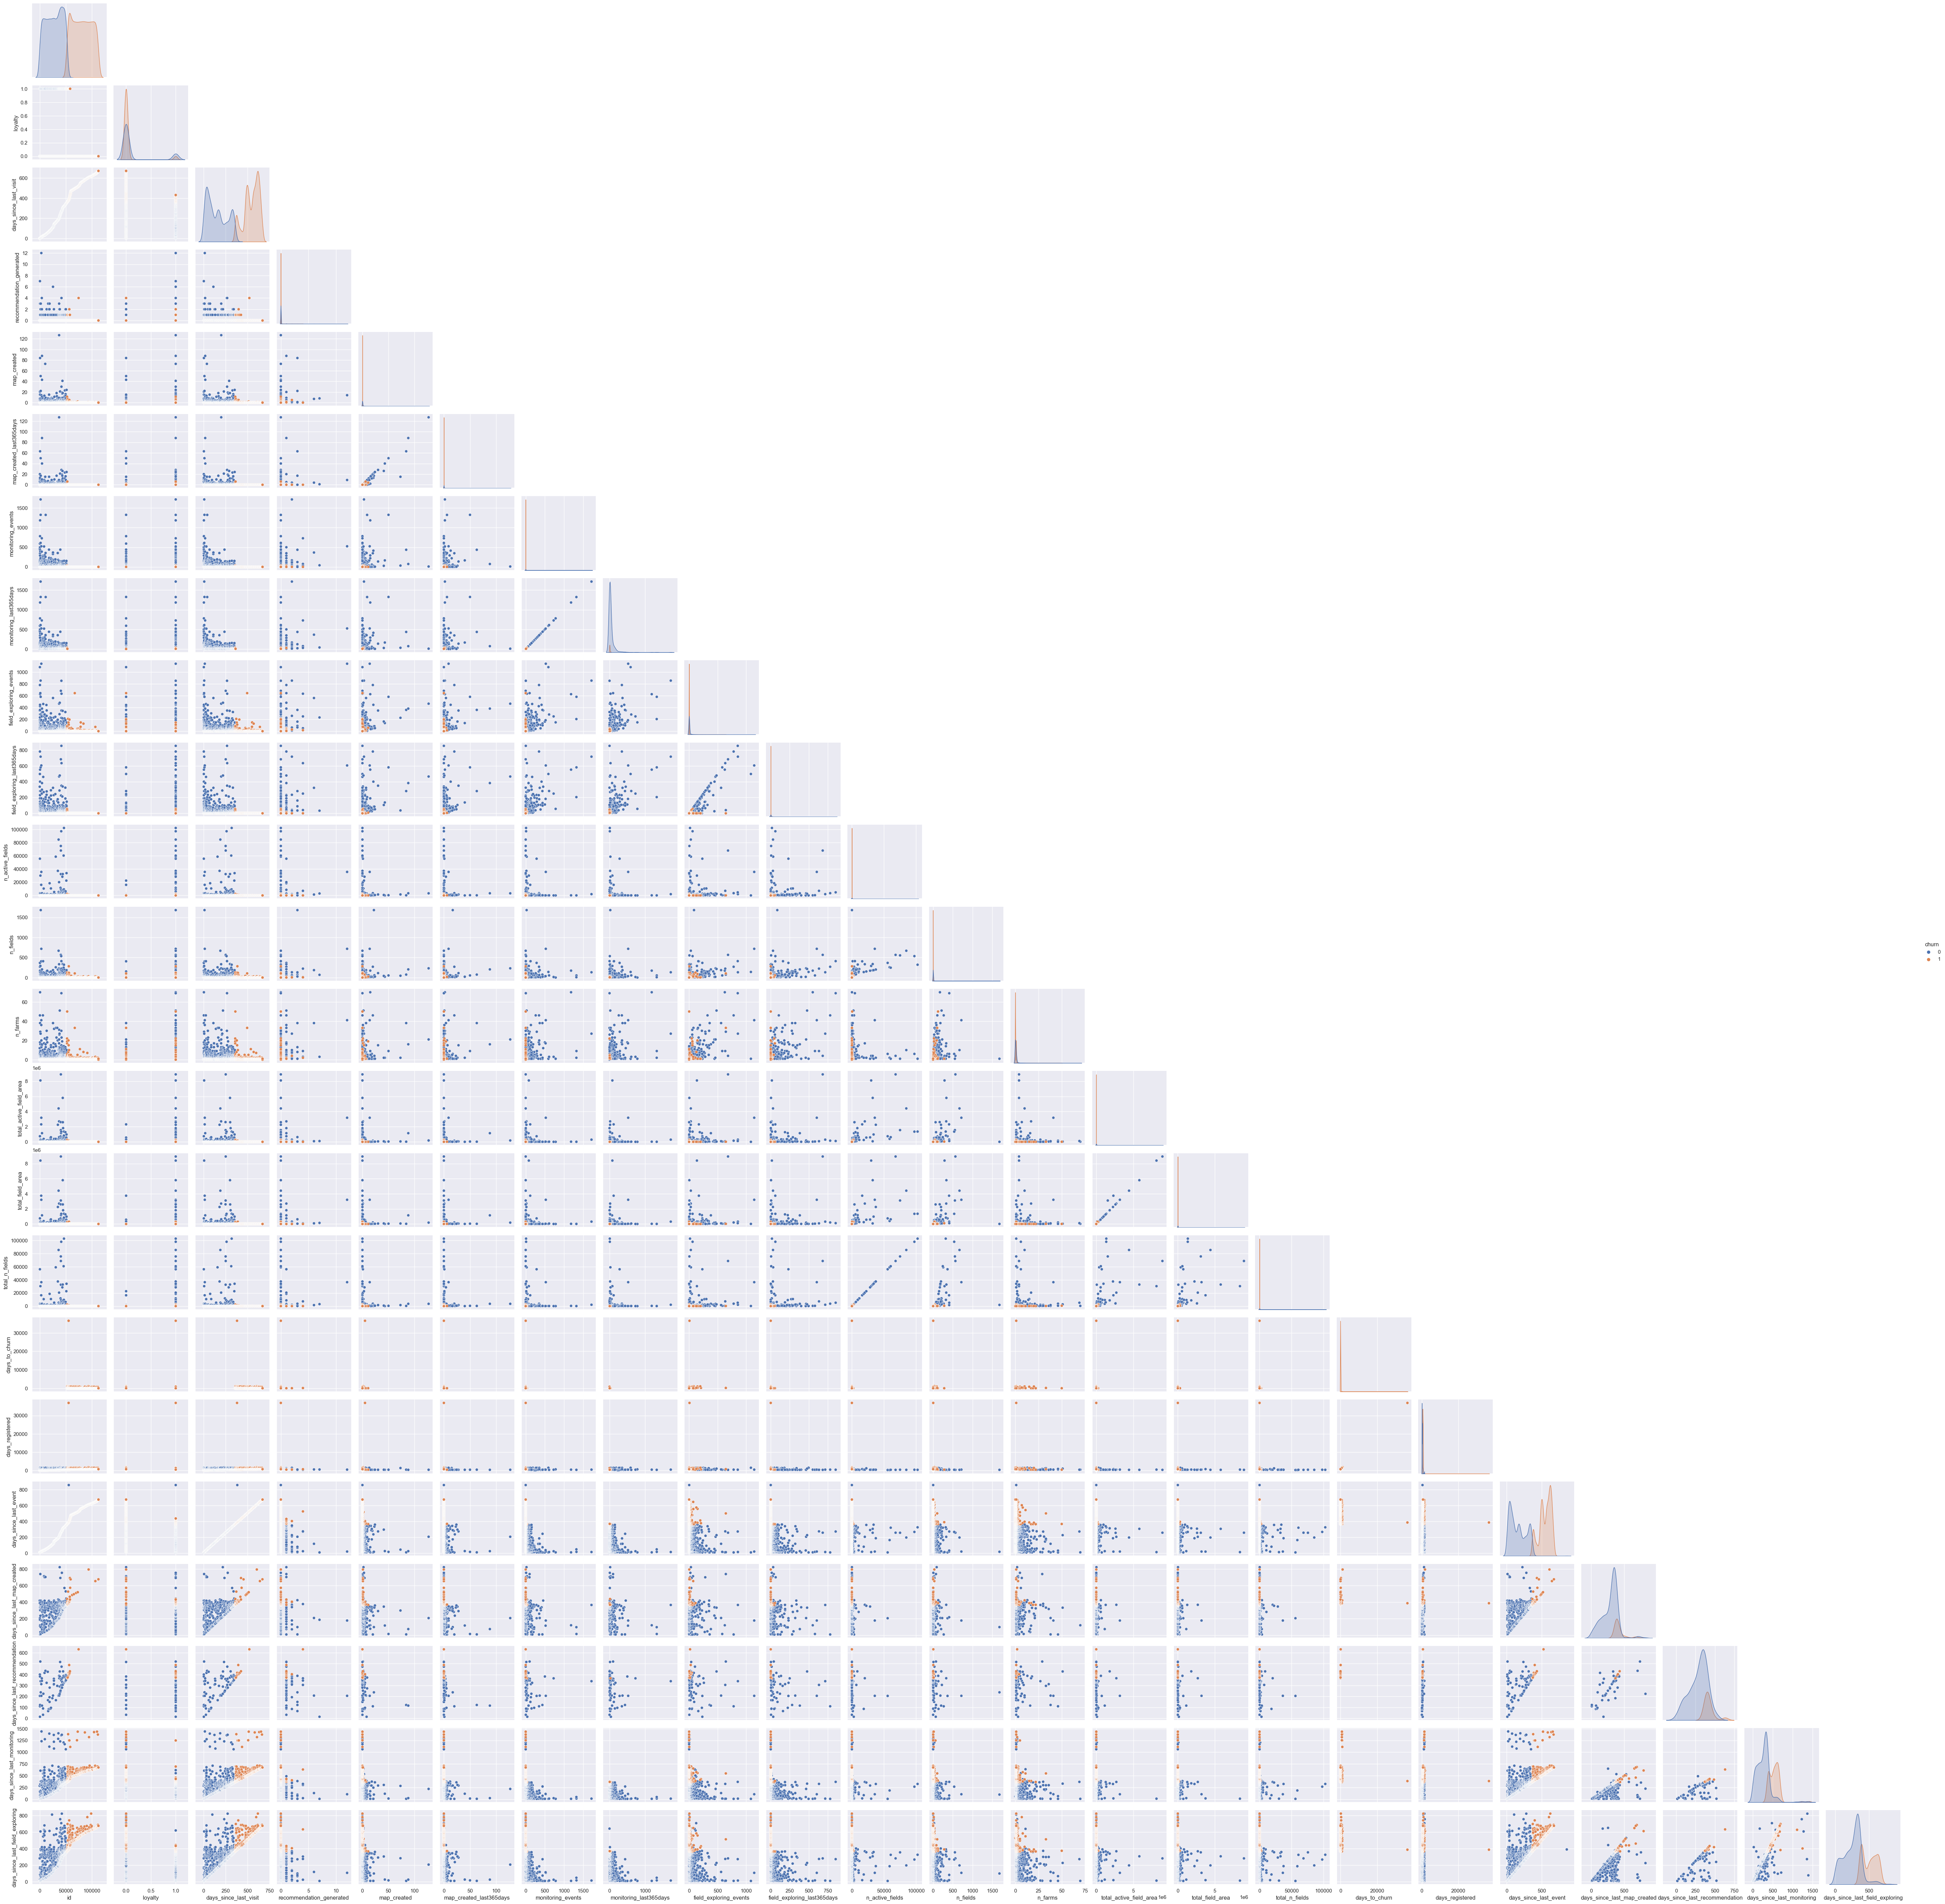

In [82]:
# Pairplot
plt.figure(figsize=(8, 5))
sns.pairplot(data = case_dataset_prepared, corner = True, hue = 'churn', kind='scatter')
plt.savefig('churn-correlation.jpg')

non-loyalty users tends to churn more

In [114]:
# Separar os dados entre features matrix e target vector
X = case_dataset_prepared.drop(['churn'], axis=1)
y = case_dataset_prepared['churn']

y.value_counts()

churn
1    6561
0    6200
Name: count, dtype: int64

In [115]:
#Verificando as colunas com informações categóricas
colunas_categoricas = [col for col in X.select_dtypes(exclude='number').columns]
colunas_categoricas

['user_type', 'loyalty', 'main_crop', 'state', 'region']

In [116]:
#Ecoding o dataset
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

#armazenando o dicionário de dados
label_dict = defaultdict(LabelEncoder)

#fit do enconder
label = LabelEncoder()

X = X.apply(lambda i: label_dict[i.name].fit_transform(i))

#Dicionário do encoder:
label_dict

defaultdict(sklearn.preprocessing._label.LabelEncoder,
            {'id': LabelEncoder(),
             'user_type': LabelEncoder(),
             'loyalty': LabelEncoder(),
             'days_since_last_visit': LabelEncoder(),
             'recommendation_generated': LabelEncoder(),
             'map_created': LabelEncoder(),
             'map_created_last365days': LabelEncoder(),
             'monitoring_events': LabelEncoder(),
             'monitoring_last365days': LabelEncoder(),
             'field_exploring_events': LabelEncoder(),
             'field_exploring_last365days': LabelEncoder(),
             'n_active_fields': LabelEncoder(),
             'n_fields': LabelEncoder(),
             'n_farms': LabelEncoder(),
             'total_active_field_area': LabelEncoder(),
             'total_field_area': LabelEncoder(),
             'main_crop': LabelEncoder(),
             'state': LabelEncoder(),
             'region': LabelEncoder(),
             'total_n_fields': LabelEncoder(

In [117]:
# Identificar variáveis numéricas
col_numb = [col for col in X.select_dtypes(['int', 'float']).columns.tolist() if col not in colunas_categoricas]

# como convertemos para colunas dummies iremos identificar novamente as colunas com apenas dois valores
col_dummies = X.nunique()[X.nunique() == 2].keys().tolist()

# Identificar colunas com mais de uma categoria
val_cate = [col for col in X.columns.tolist() if col not in col_dummies + col_numb]

In [118]:
#Convertendo as variáveis dummies para colunas dummies
X = pd.get_dummies(X, columns = val_cate)
X.head()

,id,loyalty,days_since_last_visit,recommendation_generated,map_created,map_created_last365days,monitoring_events,monitoring_last365days,field_exploring_events,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area,total_n_fields,days_registered,days_since_last_event,days_since_last_map_created,days_since_last_recommendation,days_since_last_monitoring,days_since_last_field_exploring,user_type_0,user_type_1,user_type_2,main_crop_0,main_crop_1,main_crop_2,main_crop_3,main_crop_4,main_crop_5,main_crop_6,main_crop_7,main_crop_8,main_crop_9,main_crop_10,main_crop_11,main_crop_12,main_crop_13,main_crop_14,main_crop_15,main_crop_16,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,state_11,state_12,state_13,state_14,state_15,state_16,state_17,state_18,state_19,state_20,state_21,state_22,state_23,state_24,state_25,state_26,region_0,region_1,region_2,region_3,region_4,region_5
0,0,0,0,0,0,0,0,173,0,0,0,0,0,0,0,0,0,0,249,81,607,575,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,1,0,0,0,0,0,0,173,0,0,0,0,0,0,0,0,0,0,249,81,607,575,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,2,0,0,0,0,0,0,173,0,0,0,0,0,0,0,0,0,0,249,81,607,575,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,3,0,0,0,0,0,0,173,0,0,0,0,0,0,0,0,2,0,249,81,607,575,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,4,0,0,0,0,0,0,173,0,0,0,0,0,0,0,0,0,0,249,81,607,575,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [119]:
X.fillna(X.mean(), inplace=True)

In [120]:
#importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [121]:
#1. Escolha do modelo
from sklearn.ensemble import RandomForestClassifier

#2. Instanciar o modelo e optimizar hiperparâmetros
model_rf = RandomForestClassifier(max_depth=4, random_state=42)

#Separando os dados em features matrix e target vector

#3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X.drop('id', axis=1), y, random_state=42)

#4. Fit do modelo
model_rf.fit(X_train, y_train)

#5. Previsões
y_pred_rf = model_rf.predict(X_test)


In [122]:
#Reservar a Acurácia  para compararmos depois
acc_rf = accuracy_score(y_test,y_pred_rf)

#Verificando o Reporte de Classificação para o primeiro modelo
report_rf = classification_report(y_test, y_pred_rf, digits=2)
print("A acurácia do modelo é: {:.2}.\n".format(acc_rf))
print(report_rf)

A acurácia do modelo é: 1.0.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1593
           1       1.00      1.00      1.00      1598

    accuracy                           1.00      3191
   macro avg       1.00      1.00      1.00      3191
weighted avg       1.00      1.00      1.00      3191



In [41]:
#1. importando bibliotecas necessárias
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

#2. Instanciar os modelos e definir hyperparametros

model_xgbc = XGBClassifier()
model_sgd = SGDClassifier()
model_svc = SVC()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
voting_clf = VotingClassifier(estimators =[('xgbc', model_xgbc), ('sgd', model_sgd), ('svc', model_svc),('dt', model_dt), ('lr', model_lr)], voting='hard')

#3. Separar os dados
#os dados já foram separados anteiormente

#3.1 Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#4. Fit do modelo
for model in (model_xgbc, model_sgd, model_svc, model_dt,model_lr, voting_clf):
  model.fit(X_train_scaled, y_train)

#5. Fazer previsões em cima dos dados
model = []
accuracy = []

for clf in (model_xgbc, model_sgd, model_svc, model_dt, model_lr, voting_clf):
  y_pred = clf.predict(X_test_scaled)
  model.append(clf.__class__.__name__)
  accuracy.append(accuracy_score(y_test,y_pred))

#6. Verifcando Acurácia dos modelos
col = ['Acuracia']
ac = pd.DataFrame(data=accuracy, index=model, columns=col)
ac

,Acuracia
XGBClassifier,1.00
SGDClassifier,0.99
SVC,0.99
DecisionTreeClassifier,0.50
LogisticRegression,1.00
VotingClassifier,1.00


In [42]:
# Aplicando Validação Cruzada com K-Fold
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = voting_clf, X = X_train_scaled, y = y_train, cv = 10, verbose=3)
print("Acurácia: {:.2f} %".format(accuracies.mean()*100))

[CV] END ................................ score: (test=1.000) total time=  59.9s
[CV] END ................................ score: (test=1.000) total time= 1.0min
[CV] END ................................ score: (test=1.000) total time= 1.0min
[CV] END ................................ score: (test=1.000) total time= 1.0min


KeyboardInterrupt: 

In [ ]:
#1. importar bibliotecas necessárias
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#2.Instanciar o modelo
xgb = XGBClassifier()

#3. definir intervalos para otimização
#3.1 Cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True)
#3.2 Intervalos para otimização


param_grid = {

    'xgb__learning_rate': [0.001, 0.01, 0.05],
    'xgb__max_depth': [i / 10.0 for i in range(0, 5)],
    'xgb__gamma': [0.01, 0.1, 1],
    'xgb__max_delta_step': [0, 10] 
}

#3.3 gerar o modelo
grid = GridSearchCV(xgb, param_grid, n_jobs=-1, scoring="balanced_accuracy", cv=kfold, verbose=3)

#4. Fit do modelo
grid_result = grid.fit(X_train_scaled, y_train)


#5. ver resultados
print("Melhor acurácia: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

In [ ]:
# 1. importar as bibliotecas necessárias
import skopt
from skopt import BayesSearchCV

In [ ]:
#2. Definir intervalos de otimziação
bayes = BayesSearchCV(
    estimator = XGBClassifier(
        n_jobs = 1,
        eval_metric = 'auc',
        silent=1,
        tree_method='auto'
    ),
    #2.1 Definindo intervalos de otimização
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    #2. definindo método de avaliação
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=10,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 6,   
    verbose = 0,
    refit = True,
    random_state = 42
)

# callback handler
def status_print_bayes(optim_result):
    bayes_resultado = bayes.best_score_
    print("Melhor resultado: %s", np.round(bayes_resultado,4))
    if bayes_resultado >= 0.98:
        print('Suficiente!')
        return True


In [ ]:
#4. Fit no modelo
otmizador = bayes.fit(X_train_scaled, y_train, callback=status_print_bayes)

In [ ]:
print("Melhor ROC_AUC: {} para {}".format(bayes.best_score_, bayes.best_params_))

In [ ]:
print("\n Parâmetros obtidos com Grid Search")
grid.best_params_

In [ ]:
print("\n Parâmetros obtidos com BayesSearch")
bayes.best_params_

In [ ]:
#1. Dividir dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#1.1 Padronizar os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#1.2 Rebalanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler;
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)

In [ ]:
# 1. Definir o modelo e importar as bibliotecas necessárias
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.metrics import roc_auc_score, roc_curve

# 2. Instanciar o modelo e definir hyperparâmetros
modelo_final = XGBClassifier(
    learning_rate= 0.2700390206185342 , 
    n_estimators= 83,
    max_delta_step = 18, 
    max_depth= 36, 
    min_child_weight= 2, 
    gamma= 3.811128976537413e-05,
    colsample_bylevel = 0.8015579071911014,
    colsample_bytree = 0.44364889457651413,
    reg_lambda= 659,
    reg_alpha= 1.5057560255472018e-06
    )


# 3. Fit do modelo
modelo_final.fit(X_train_rus, y_train_rus)

# 4. Fazer a previsão
X_test = scaler.transform(X_test)
y_pred = modelo_final.predict(X_test)

# 5.1 Classification Report
print(classification_report(y_test, y_pred))

# 5.2 imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# 5.3 plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()


In [ ]:
import shap
#Instanciando a ferramenta
explainer = shap.TreeExplainer(modelo_final)
#passando os dados de treinamento para que a ferramenta possa entender a influência de cada variável no modelo
shap_values = explainer.shap_values(X_train_rus)

In [ ]:
#verificando a influência de cada variável para um exemplo no modelo
shap.initjs() #no colab é necessário chamar a instância em todas as células
shap.force_plot(explainer.expected_value, shap_values, X_train_rus)

In [ ]:
#verificando o peso de cada variável no modelo de Machine Learning
shap.initjs() #no colab é necessário chamar a instância em todas as células
shap.summary_plot(shap_values, X_train_rus)

In [ ]:
#cirar uma lista com as colunas que foram treinadas no modelo final
encoded_list = X.columns
#para facilitar a visualização será criado um novo dataset com a numeração para cada coluna
#Labels Dataframe
labels =  pd.DataFrame(
    {"labels" : encoded_list})
labels

In [ ]:
#Variável 33 equivale a variável Contrato com valor 0, que é:
label_dict['Contract'].inverse_transform([0])
